In [10]:
!%pwd

/c/Users/Albert Leung/Downloads/003-20210802T000211Z-001/003/exports/000


In [3]:
# Data: Jan 31, 2021
# !/usr/bin/env python

import os
import pandas as pd
from IPython.display import display
#import PupilFolderFileCheck as flchk

# LOAD EXPORTED DATA

#RECORDING_LOCATION = flchk.ask_location()
RECORDING_LOCATION = 'c:\\Users\\Albert Leung\\Downloads\\003\\exports\\000'
os.chdir(RECORDING_LOCATION)

def load_3Ddata():

    ''' This function imports pupil positions data and loads data. '''

    #exported_pupil_csv = os.path.join(RECORDING_LOCATION, 'pupil_positions.csv')    # load "_unix_datetime.csv" file after running TimeSync python file.
    exported_pupil_csv = 'pupil_positions.csv'
    pupil_pd_frame = pd.read_csv(exported_pupil_csv)
    
    return pupil_pd_frame


def filter_3Ddata():

    ''' This function loads imports and stores data post the first 5 seconds. '''

    pupil_pd_frame = load_3Ddata()

    # filter for 3D data
    detector_3d_data = pupil_pd_frame[pupil_pd_frame.method == 'pye3d 0.1.1 real-time']
    

    # skip first 5 seconds to allow for the 3D model of converge
    start_time = detector_3d_data.pupil_timestamp.iloc[0] + 5
    detector_3d_data = detector_3d_data[detector_3d_data.pupil_timestamp > start_time]

    return detector_3d_data


def display_filtered_3Ddata():

    ''' This function takes in the filtered 3D data and then prints that data. '''

    pupil_pd_frame = load_3Ddata()
    detector_3d_data = filter_3Ddata()
    

    # split in right eye
    eye0_df = detector_3d_data[detector_3d_data.eye_id == 0]
    pd.options.display.float_format = '{:.3f}'.format

    print("Columns present in pupil data: ")
    print(list(pupil_pd_frame.columns))

    print("eye0 (right eye) data: ")
    display(eye0_df[['pupil_timestamp', 'eye_id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter_3d']].head(10))




Columns present in pupil data: 
['pupil_timestamp', 'world_index', 'eye_id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter', 'method', 'ellipse_center_x', 'ellipse_center_y', 'ellipse_axis_a', 'ellipse_axis_b', 'ellipse_angle', 'diameter_3d', 'model_confidence', 'model_id', 'sphere_center_x', 'sphere_center_y', 'sphere_center_z', 'sphere_radius', 'circle_3d_center_x', 'circle_3d_center_y', 'circle_3d_center_z', 'circle_3d_normal_x', 'circle_3d_normal_y', 'circle_3d_normal_z', 'circle_3d_radius', 'theta', 'phi', 'projected_sphere_center_x', 'projected_sphere_center_y', 'projected_sphere_axis_a', 'projected_sphere_axis_b', 'projected_sphere_angle']
eye0 (right eye) data: 


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
1241,8015.844,0,0.990,0.309,0.592,2.900
1243,8015.852,0,1.000,0.305,0.598,2.868
1245,8015.860,0,0.992,0.303,0.602,2.896
1247,8015.868,0,1.000,0.304,0.603,2.880
1249,8015.876,0,1.000,0.304,0.604,2.890
1251,8015.888,0,1.000,0.304,0.604,2.889
1253,8015.896,0,1.000,0.305,0.604,2.879
1255,8015.904,0,1.000,0.305,0.604,2.854
1257,8015.912,0,0.983,0.304,0.605,2.865
1259,8015.920,0,1.000,0.304,0.606,2.875


<IPython.core.display.Javascript object>


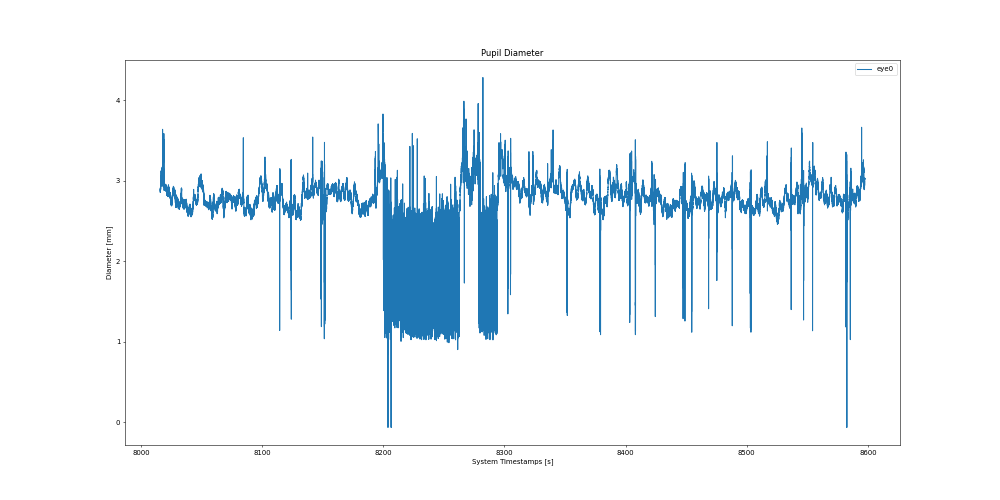

<IPython.core.display.Javascript object>


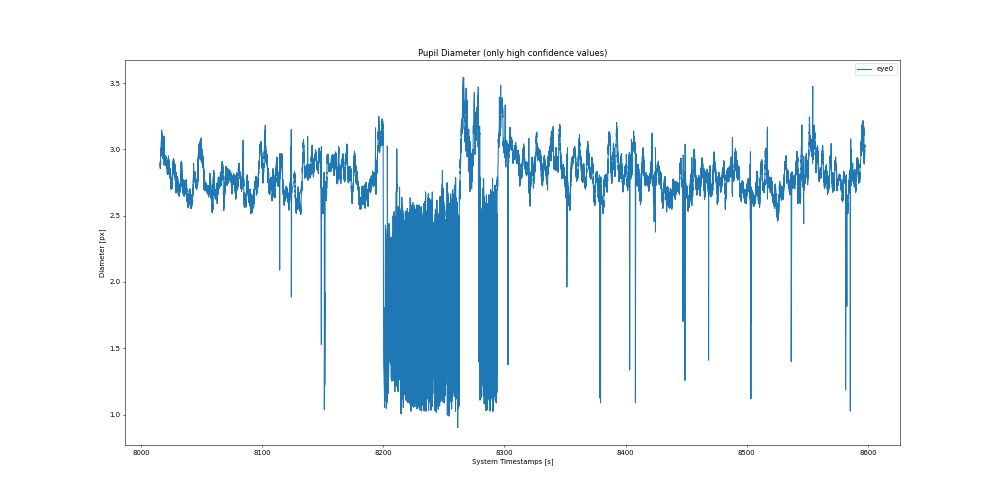

<IPython.core.display.Javascript object>


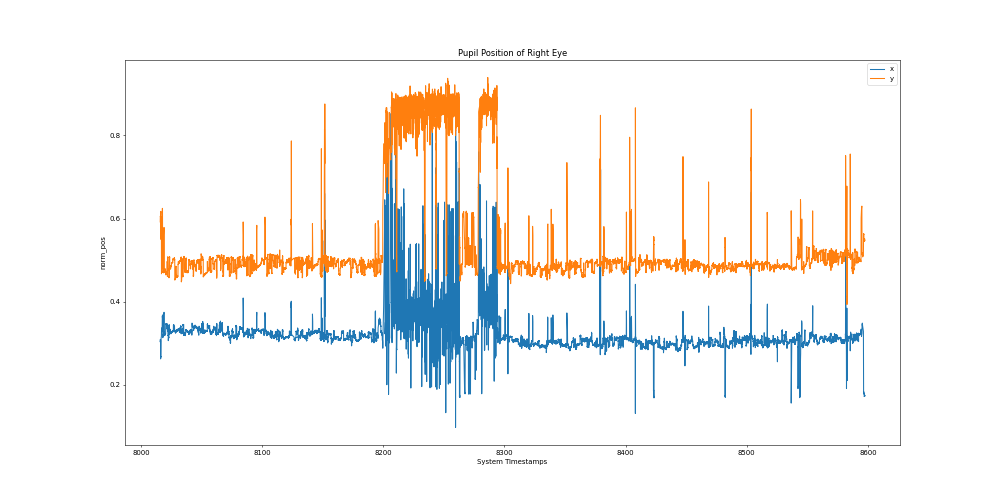

<IPython.core.display.Javascript object>


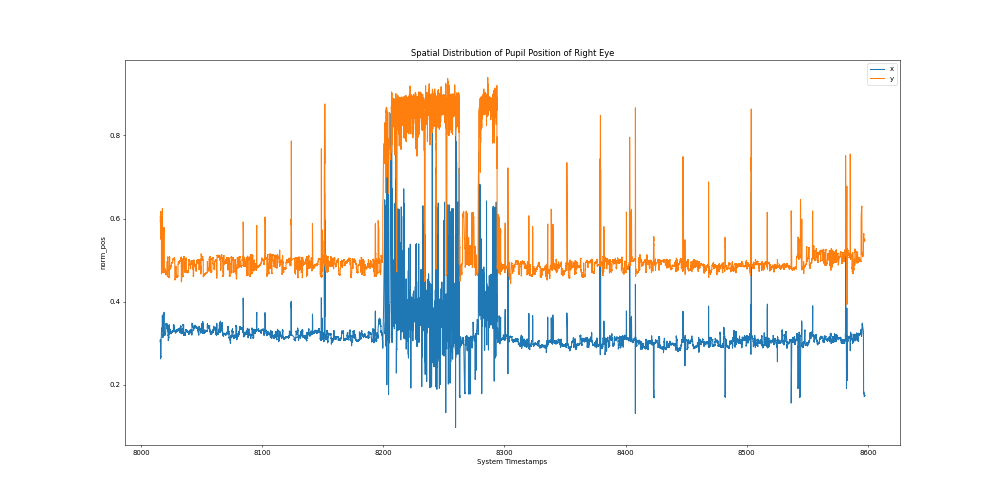

In [22]:
# VISUALIZE PUPILLOMETRY DATA
# Enable interactive plot
%matplotlib notebook
import matplotlib.pyplot as plt

# Plot Pupil Diameter

def draw_plots():

    ''' This function plots pupil positions and diameter using Pupil timestamps. After running TimeSync python file,
    you can plot using the System Time, i.e. Unix timestamps. '''

    pupil_pd_frame = load_3Ddata()
    detector_3d_data = filter_3Ddata()


    eye0_df = detector_3d_data[detector_3d_data.eye_id == 0]

    fig1 = plt.figure(figsize=(20, 10), dpi=50)
    plt.plot(eye0_df['pupil_timestamp'], eye0_df['diameter_3d'])
    plt.legend(['eye0'])
    plt.xlabel('System Timestamps [s]')
    plt.ylabel('Diameter [mm]')
    plt.title('Pupil Diameter')
    plt.show()
    
    # Plotting values with CI of over 0.95

    eye0_high_conf_df = eye0_df[eye0_df['confidence'] > 0.95]

    fig2 = plt.figure(figsize=(20, 10), dpi=50)
    plt.plot(eye0_high_conf_df['pupil_timestamp'], eye0_high_conf_df['diameter_3d'])
    plt.legend(['eye0'])
    plt.xlabel('System Timestamps [s]')
    plt.ylabel('Diameter [px]')
    plt.title('Pupil Diameter (only high confidence values)')
    plt.show()

    # Plot Pupil Positions

    fig3 = plt.figure(figsize=(20, 10), dpi=50)

    # plot right eye
    plt.plot(eye0_high_conf_df['pupil_timestamp'], eye0_high_conf_df['norm_pos_x'])
    plt.plot(eye0_high_conf_df['pupil_timestamp'], eye0_high_conf_df['norm_pos_y'])
    plt.xlabel('System Timestamps')
    plt.ylabel('norm_pos')
    plt.title('Pupil Position of Right Eye')
    plt.legend("xy")
    plt.show()

    # Plot Spatial Distribution

    fig4= plt.figure(figsize=(20, 10), dpi=50)

    # plot right eye
    plt.plot(eye0_high_conf_df['pupil_timestamp'], eye0_high_conf_df['norm_pos_x'])
    plt.plot(eye0_high_conf_df['pupil_timestamp'], eye0_high_conf_df['norm_pos_y'])
    plt.xlabel('System Timestamps')
    plt.ylabel('norm_pos')
    plt.title('Spatial Distribution of Pupil Position of Right Eye')
    plt.legend("xy")
    plt.show()

    

display_filtered_3Ddata()
draw_plots()



In [20]:
import numpy as np
# Step 0: Re-import the channel data to ensure we are working with a clean list
# ==============================================================================
channelData = []
with open("c:\\Users\\Albert Leung\\Downloads\\Python III Key\\Python III\\data\\withPowerline.csv", "r") as data:
    for line in data:
        line = line.split(",")
        channelData.append(float(line[0]))

for point in range(len(channelData)):
    if(point%2 != 0):
        channelData[point] = channelData[point-1]

time = np.arange(0, len(channelData), 1)

# Step 1: Apply the Fourier Transform
# ====================================
# Fourier transform
yourFftData = np.fft.fft(channelData)
yourFreq = np.fft.fftfreq(len(channelData))*250

# Now we just plot the transformed data (in the frequency domain)
yourPlotFreq = yourFreq[1:int(len(yourFreq)/2)]          # Remove negative reflection
yourPlotFftData = yourFftData[1:int(len(yourFftData)/2)] # so the plot is readable

plt.plot(yourPlotFreq, yourPlotFftData.real**2 + yourPlotFftData.imag**2) # Recall FFT is a complex function
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()
plt.clf()

# Step 2: Remove the Powerline
# =============================
# To help make flexible code, let's define some variables
cutFreq = 60
tolerance = 2

# Use slicing to set a range of values to 0 amplitude
yourFftData[   cutFreq - tolerance   :   cutFreq + tolerance   ] = 0

# Plot our result - This is the same code as above!
yourPlotFreq = yourFreq[1:int(len(yourFreq)/2)]          # Remove negative reflection
yourPlotFftData = yourFftData[1:int(len(yourFftData)/2)] # so the plot is readable

plt.plot(yourPlotFreq, yourPlotFftData.real**2 + yourPlotFftData.imag**2) # Recall FFT is a complex function
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()
plt.clf()

# Step 3: Apply the Inverse Fourier Transform
# ============================================
filteredData = abs(np.fft.ifft(yourFftData))

<IPython.core.display.Javascript object>


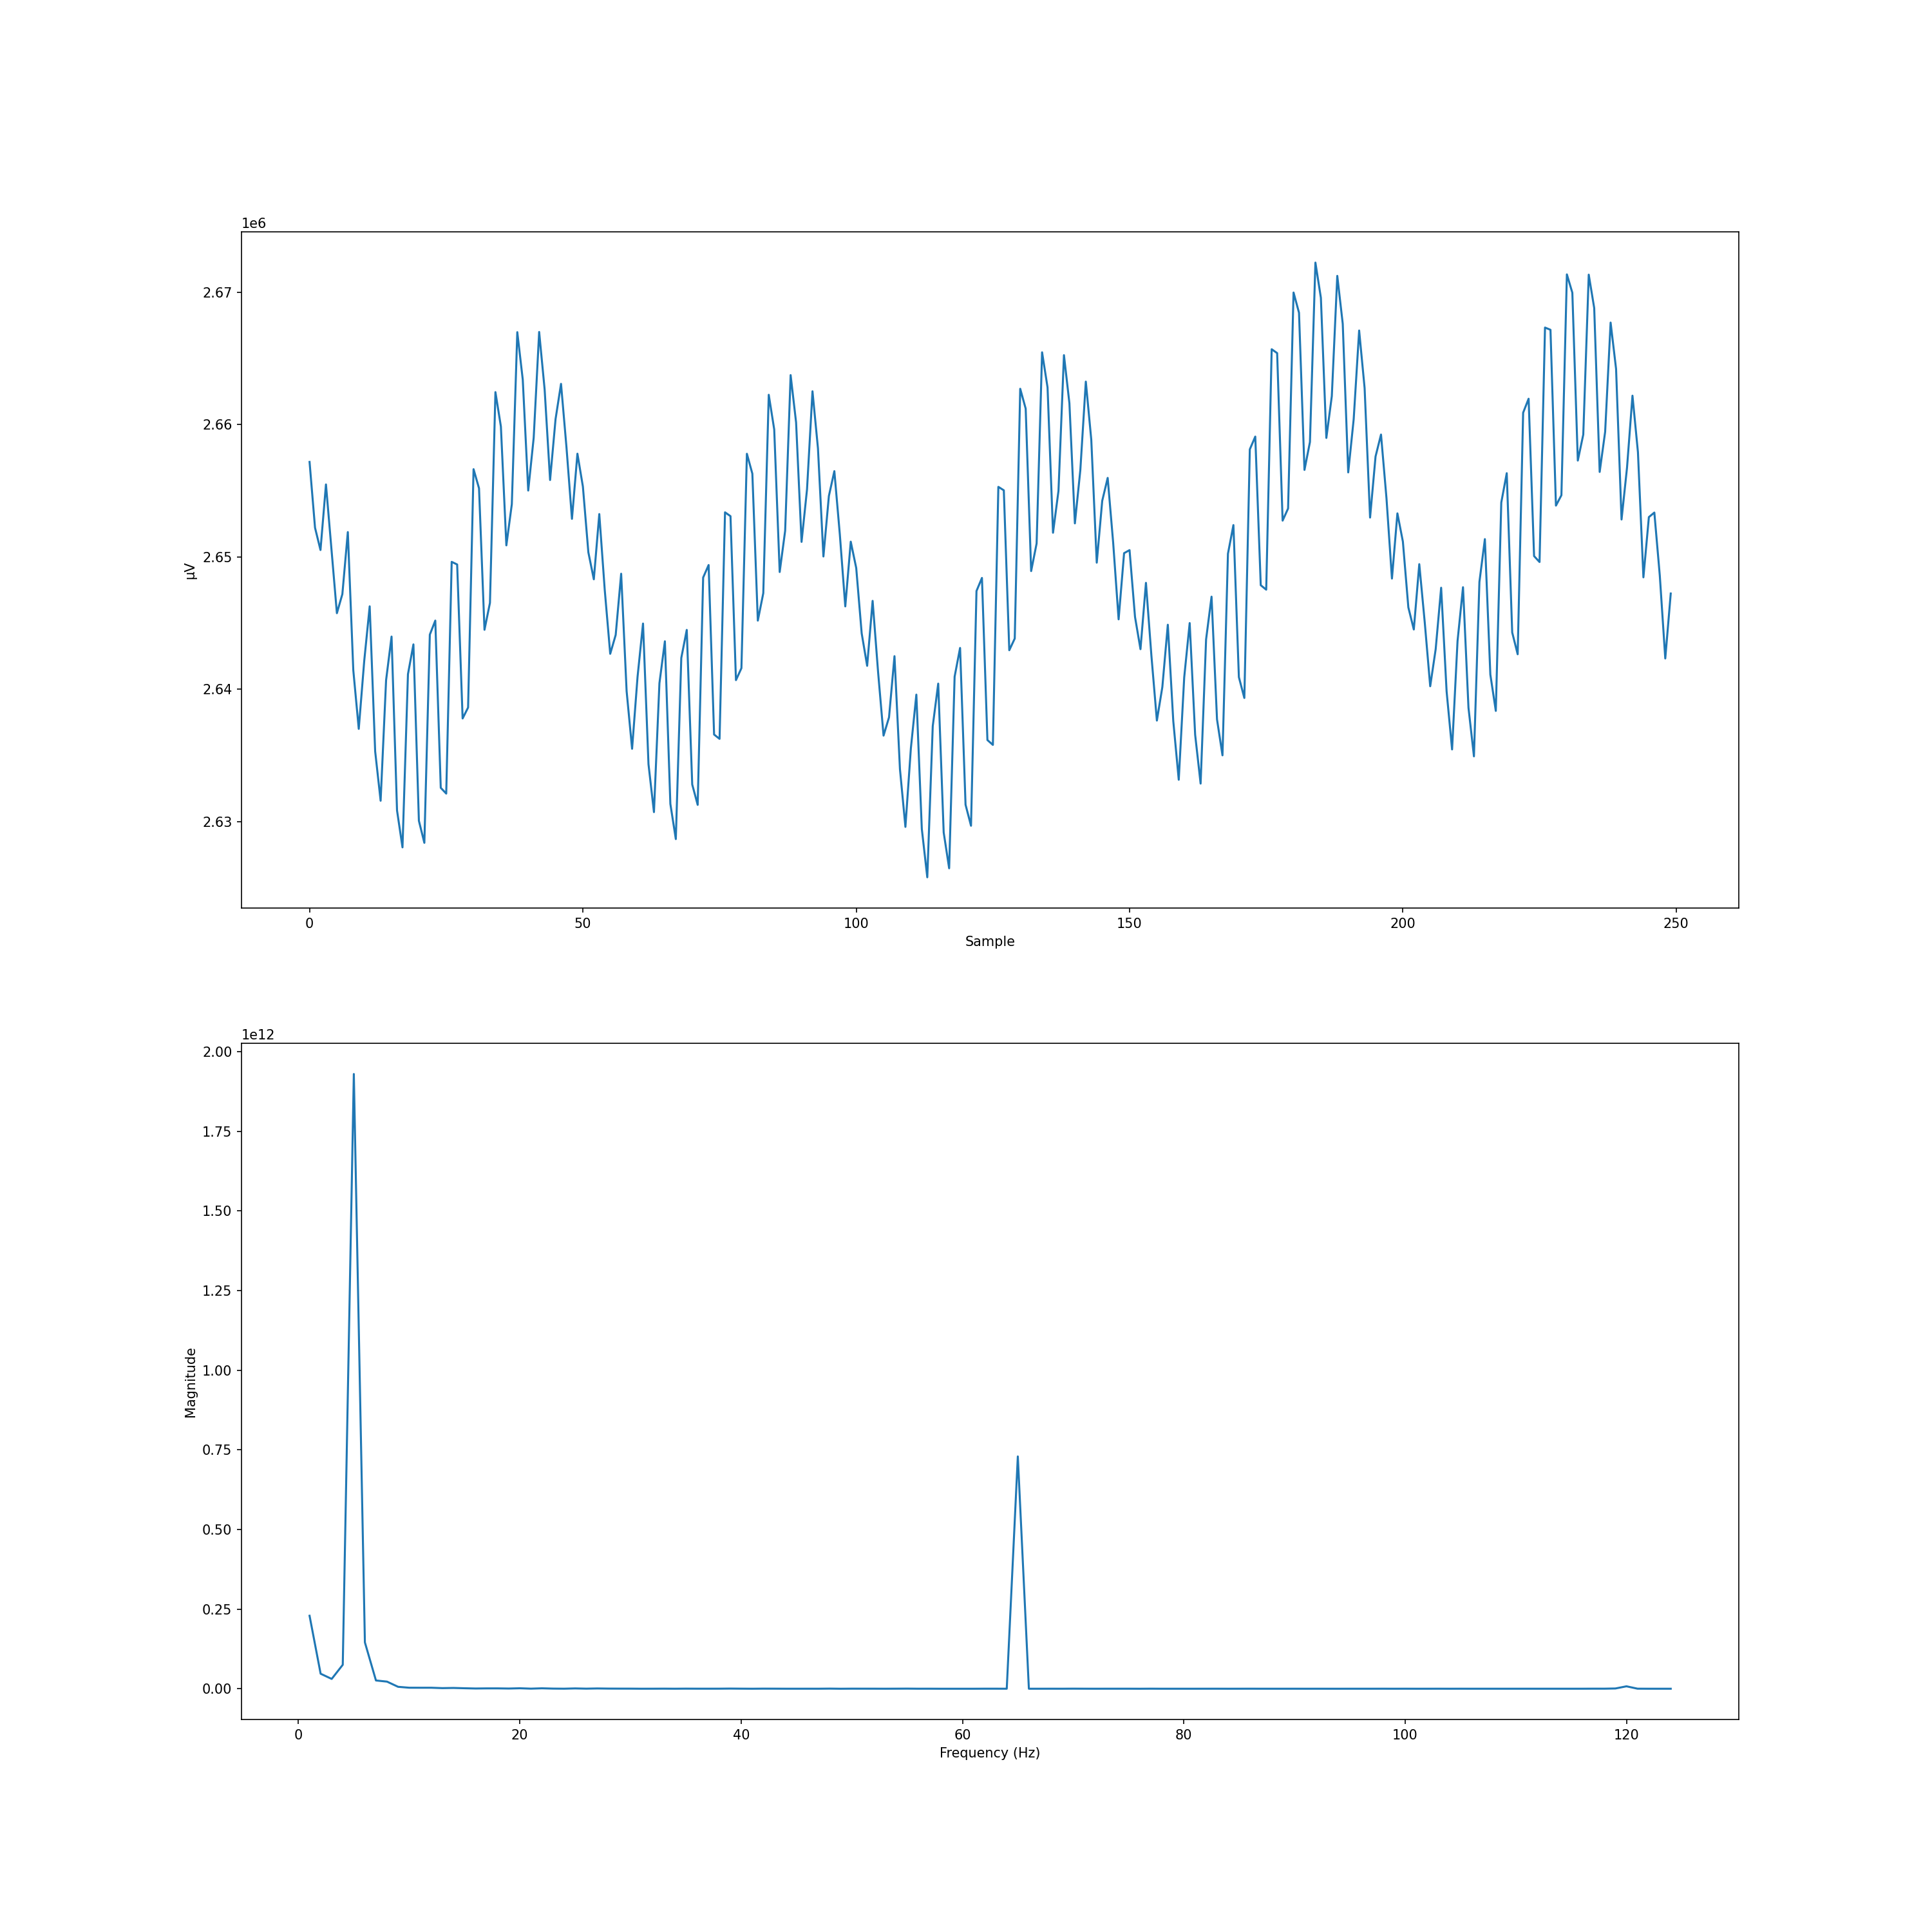

[Text(0.5, 0, 'Frequency (Hz)'), Text(0, 0.5, 'Magnitude')]

In [21]:
fig = plt.figure(figsize=(20, 20), dpi=150)
#fig = plt.figure()
#fig.tight_layout(pad=10.0)
gs = fig.add_gridspec(2, 1)
gs.figure.tight_layout()
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
# spans two columns:
#ax3 = fig.add_subplot(gs[1, :])

ax1.plot(time, filteredData)
ax1.set(xlabel='Sample', ylabel='μV')

ax2.plot(yourPlotFreq, yourPlotFftData.real**2 + yourPlotFftData.imag**2) # Recall FFT is a complex function
ax2.set(xlabel="Frequency (Hz)", ylabel="Magnitude")


<IPython.core.display.Javascript object>


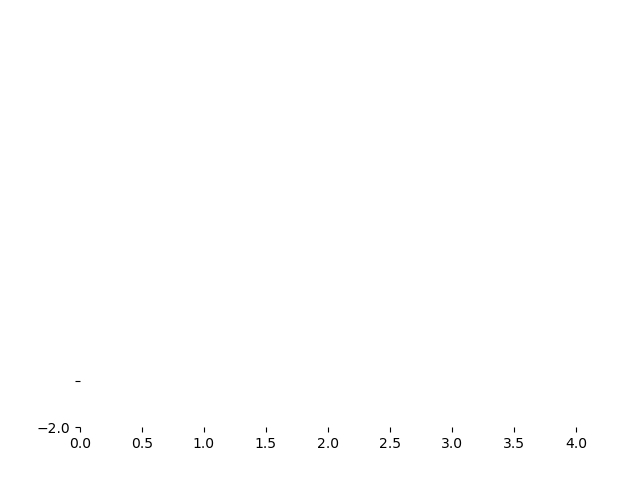

In [2]:
# Enable interactive plot
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)
plt.show()
#anim.save('sine_wave.gif', writer='imagemagick')